In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df = pd.read_csv('/content/titanic_toy.csv')


In [53]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [55]:
df.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [56]:
Age_mean = df['Age'].mean()
Fare_median = df['Fare'].median()

In [57]:
df['Age_mean'] = df['Age'].fillna(Age_mean)
df['Fare_median'] = df['Fare'].fillna(Fare_median)


In [58]:
df

,Age,Fare,Family,Survived,Age_mean,Fare_median
0,22.0,7.2500,1,0,22.000000,7.2500
1,38.0,71.2833,1,1,38.000000,71.2833
2,26.0,7.9250,0,1,26.000000,7.9250
3,35.0,53.1000,1,1,35.000000,53.1000
4,35.0,8.0500,0,0,35.000000,8.0500
...,...,...,...,...,...,...
886,27.0,13.0000,0,0,27.000000,13.0000
887,19.0,30.0000,0,1,19.000000,30.0000
888,NaN,23.4500,3,0,29.699118,23.4500
889,26.0,NaN,0,1,26.000000,14.4542


In [59]:
df['Age'].var()

211.0191247463081

In [60]:
df['Age_mean'].var()

169.05239993721085

In [61]:
df['Fare'].var()

2530.6730768999487

In [62]:
df['Fare_median'].var()

2417.971599672526

<Axes: >

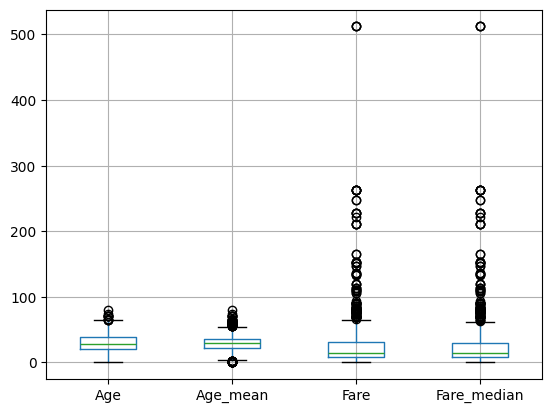

In [63]:
df[['Age','Age_mean','Fare','Fare_median']].boxplot()

In [64]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [65]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [66]:
trf = ColumnTransformer([
    ('impute_age',SimpleImputer(),['Age']),
    ('impute_fare',SimpleImputer(strategy='median'),['Fare'])
],remainder='passthrough')

In [67]:
trf

ColumnTransformer(remainder='passthrough',
                  transformers=[('impute_age', SimpleImputer(), ['Age']),
                                ('impute_fare',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [68]:
x_train = trf.fit_transform(x_train)
x_test = trf.transform(x_test)

In [69]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

In [70]:
x_train

,0,1,2,3,4
0,40.000000,27.7208,0.0,40.000000,27.7208
1,4.000000,16.7000,2.0,4.000000,16.7000
2,47.000000,9.0000,0.0,47.000000,9.0000
3,9.000000,31.3875,6.0,9.000000,31.3875
4,20.000000,9.8458,0.0,20.000000,9.8458
...,...,...,...,...,...
707,30.000000,8.6625,0.0,30.000000,8.6625
708,29.785904,8.7125,0.0,29.699118,8.7125
709,71.000000,49.5042,0.0,71.000000,49.5042
710,29.785904,221.7792,0.0,29.699118,221.7792


In [71]:
trf.named_transformers_['impute_age'].statistics_


array([29.78590426])

In [72]:
trf.named_transformers_['impute_fare'].statistics_

array([14.4583])